## Ejercicio 5-2: Creación de un modelo de clasifición binaria

El siguiente programa de ejemplo muestra la creación y entrenamiento de un clasificador binario con Python.\
Se utiliza el dataset de las flores de Iris.\
Para facilitar la representación gráfica de los resultados, se utilizan solo dos atributos predictores de los cuatro que tiene el dataset original: sepal_length y sepal_width.\
El atributo target u objetivo, es decir, aquel cuyo valor tiene que predecir el modelo en función de los atributos predictores, es el atributo class.\
Para que el problema sea de clasificación binaria se consideran solo los datos para dos de las tres clases del dataset original.\
En este ejemplo vamos a utilizar un clasificador binario de la clase Perceptron. \
Independientemente del clasificador utilizado, la forma de entrenarlo y obtener la tasa de acierto siempre es la misma con Scikit-Learn.\
El entrenamiento se hace con el método fit.\
La predicción para los valores de entrenamiento se hace con el método predict.\
Por último, se obtiene una métrica de la calidad de los resultados, que depende de las diferencias entre los valores reales y los valores obtenidos con accuracy rate.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

In [2]:
# Creamos el DataFrame y añadimos etiquetas a las columnas
df = pd.read_csv('./data/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
# No centramos en la columna class y nos quedamos solo con las filas en las que la clase coincida con las indicadas
df = df[df['class'].isin(['Iris-setosa', 'Iris-versicolor'])]

In [4]:
df.info

<bound method DataFrame.info of     sepal_length  sepal_width  petal_length  petal_width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]>

In [5]:
# Obtenemos el Dataframe x con las features predictoras y el Dataframe y con la columna objetivo
x = df[['sepal_length', 'sepal_width']]
y = df['class']

In [6]:
# Si eliminamos la parte de aleatoriedad, cada vez que ejecutemos la linea se van a generar dataset con eleción de datos distintos
# esto puede generar disparidad de resultados de validación en cada ejecución.

# Definición de semilla aleatoria
RANDOM_SEED = 10

# Partición en datos de entrenamiento y de validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape,'  ',y_train.shape)

(80, 2)    (80,)


In [7]:
print('Dimensiones del dataset de entrenamiento: ',x_train.shape,'  ',y_train.shape) # filas y de columnas de las features y filas y columnas del target
print('Dimensiones del dataset de validación: ',x_test.shape, '  ',y_test.shape)     # filas y de columnas de las features y filas y columnas del target

Dimensiones del dataset de entrenamiento:  (80, 2)    (80,)
Dimensiones del dataset de validación:  (20, 2)    (20,)


In [8]:
# Creación de un clasificador lineal (perceptron)
clf = Perceptron()

In [9]:
# Entrenamiento del clasificador
clf.fit(x_train, y_train) # Pasamos los valores de los atributos predictores y el correspondiente resultado o etiquetas

Perceptron()

In [10]:
# Predicción para datos de validación
y_pred = clf.predict(x_test) # Ahora solo pasamos un conjunto de valores predictores y vemos cual es la propuesta del modelo

In [11]:
# Tasa de aciertos para los datos de validación
acc_score = accuracy_score(y_test, y_pred)
print('Tasa de aciertos con los datos de validación o test: ',acc_score)

Tasa de aciertos con los datos de validación o test:  0.95


In [12]:
# Predicción para dataset de entrenamiento
y_pred_train = clf.predict(x_train)

In [13]:
# Tasa de aciertos con los datos de entrenamiento
acc_score_train = accuracy_score(y_train, y_pred_train) 
print('Tasa de aciertos con los datos de entrenamiento: ',acc_score_train)

Tasa de aciertos con los datos de entrenamiento:  1.0


Text(0, 0.5, 'sepal_width')

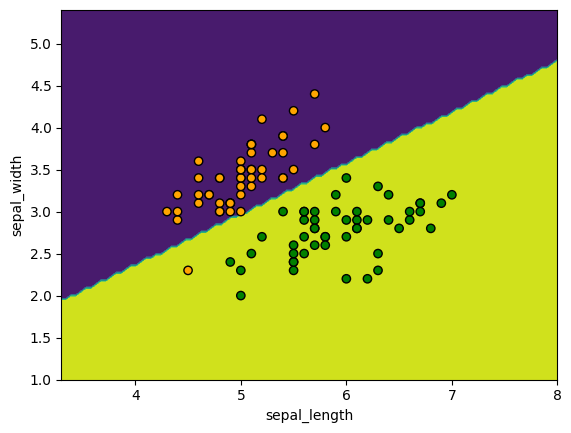

In [14]:
# Mostrar fronteras de decisión del clasificador
# El argumento response_method determina como calcular las clases
# response_method="predict" obtiene directamente las clases
# response_method="predict_proba"  obtiene la probabilidad de obtener cada clase
DecisionBoundaryDisplay.from_estimator(clf, x, response_method="predict") 
# Asigna colores a las clases esperadas
colores = {'Iris-setosa':'orange', 'Iris-versicolor':'green' }

# La varible y contiene las clases
# x['sepal_length'] y x['sepal_width'] son los datos en el eje x e y respectivamente
# y.map(colores) convierte los valores de y en colores específicos usando un mapeo definido en colores
# edgecolor='k' asigna un borde negro ('k' para "black") a cada punto en el gráfico
plt.scatter(x['sepal_length'], x['sepal_width'], c=y.map(colores), edgecolor='k', )

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

## Ejercicio:
Modificar el programa anterior para llevar a cabo una clasificación de las clases  'Iris-versicolor' e 'Iris-virginica' partiendo de las features 'petal_length', 'petal_width'
calculando los mismos parametros que en el caso anterior y obteniendo la misma representación gráfica.
Llamar al nuevo notebook "Ejercicio1bis_ClasificacionBinaria.ipynb"

## Ejercicio:
Modificar el programa del ejercicio 5-1 Regresión lineal para llevar a cabo un entrenamieno partiendo el dataset en train y test 